# Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the
company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are
differences across the product with respect to customer characteristics.
Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along
with their insights/impact on the business.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

# Data Analysis / Data Exploration

In [3]:
data.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [4]:
data.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [5]:
print(data.shape,"rows in the data")
print("Columns names:",data.columns)

(180, 9) rows in the data
Columns names: Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [8]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [107]:
data[data['Product'] == 'KP281'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [108]:
data[data['Product'] == 'KP481'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [110]:
data[data['Product'] == 'KP781'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


# `DATA VISUALIZATION`

In [49]:
def plots(col, data):
    plt.figure(figsize=(20, 5))
    
    # Countplot
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[col], palette="flare")
    plt.title('Countplot of ' + col)
    
    # Pie chart
    plt.subplot(1, 2, 2)
    values = data[col].value_counts().values
    indexs = data[col].value_counts().index
    plt.pie(values, labels=indexs, autopct='%1.2f%%', colors=sns.color_palette('Set2'))
    plt.title('Percentage Distribution of ' + col)
    plt.axis('equal')
    
    plt.show()


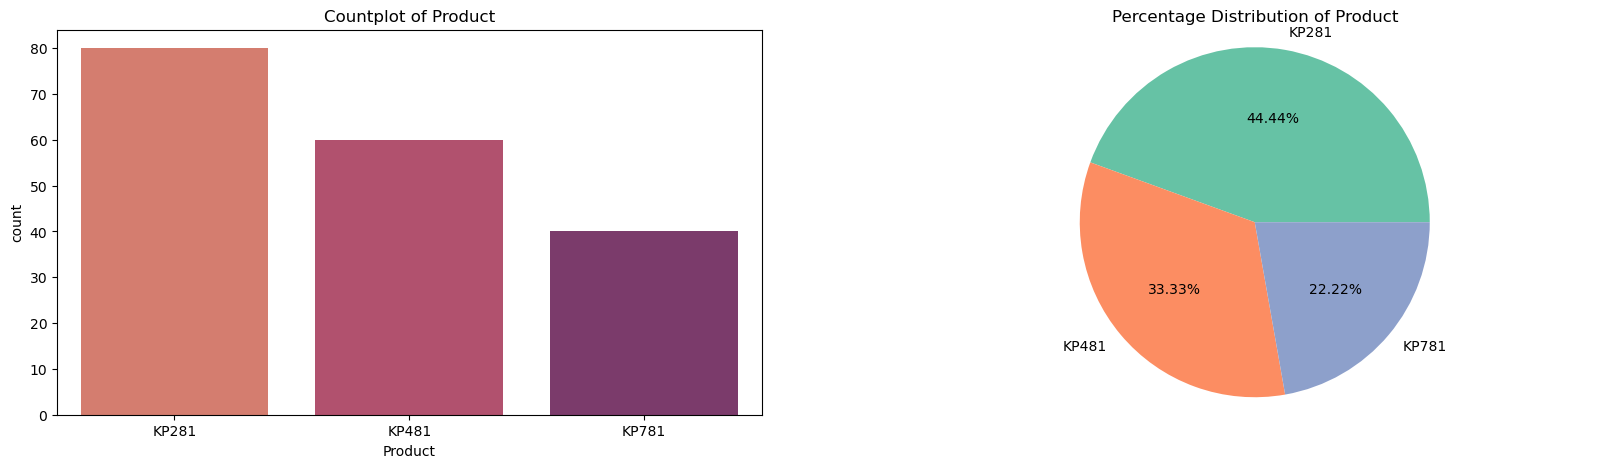

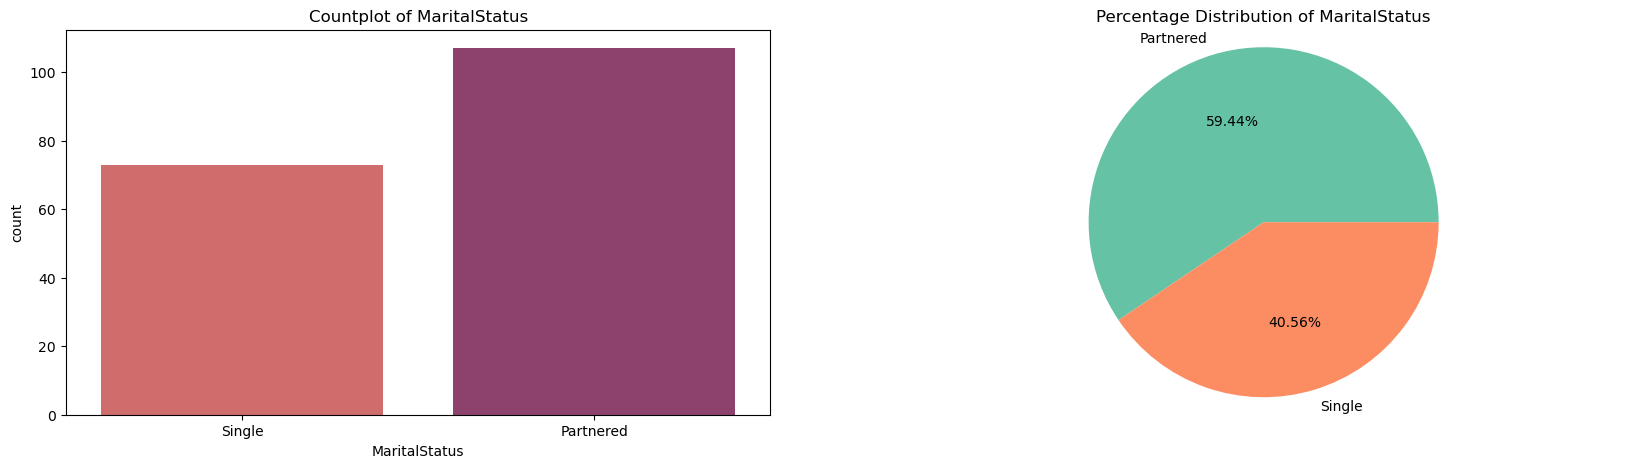

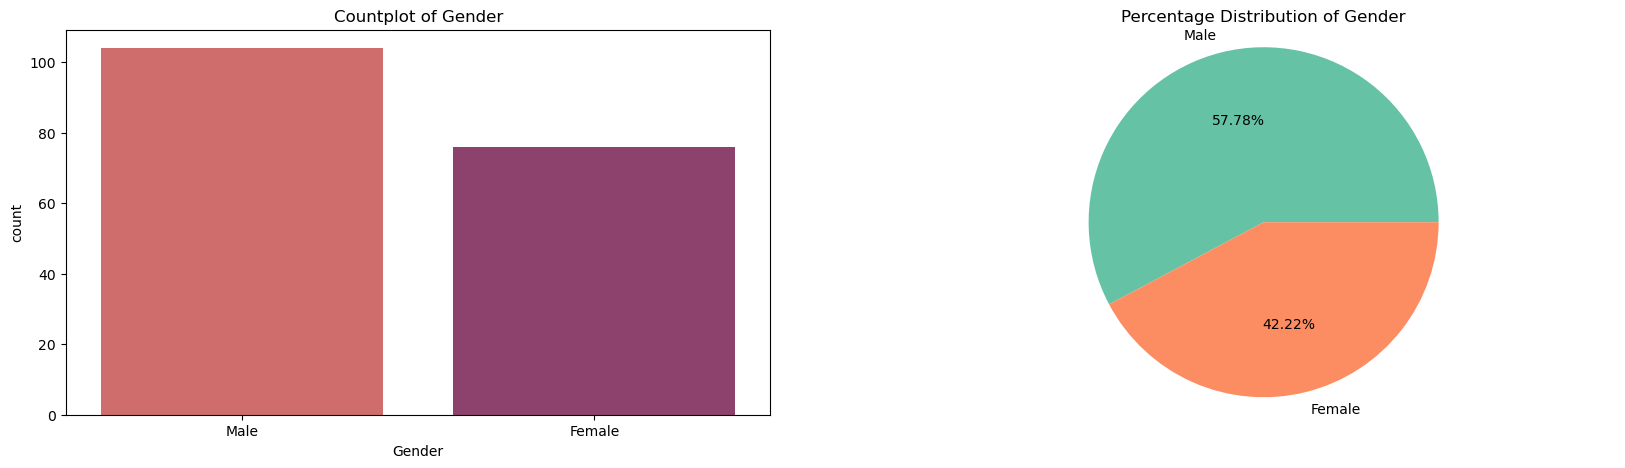

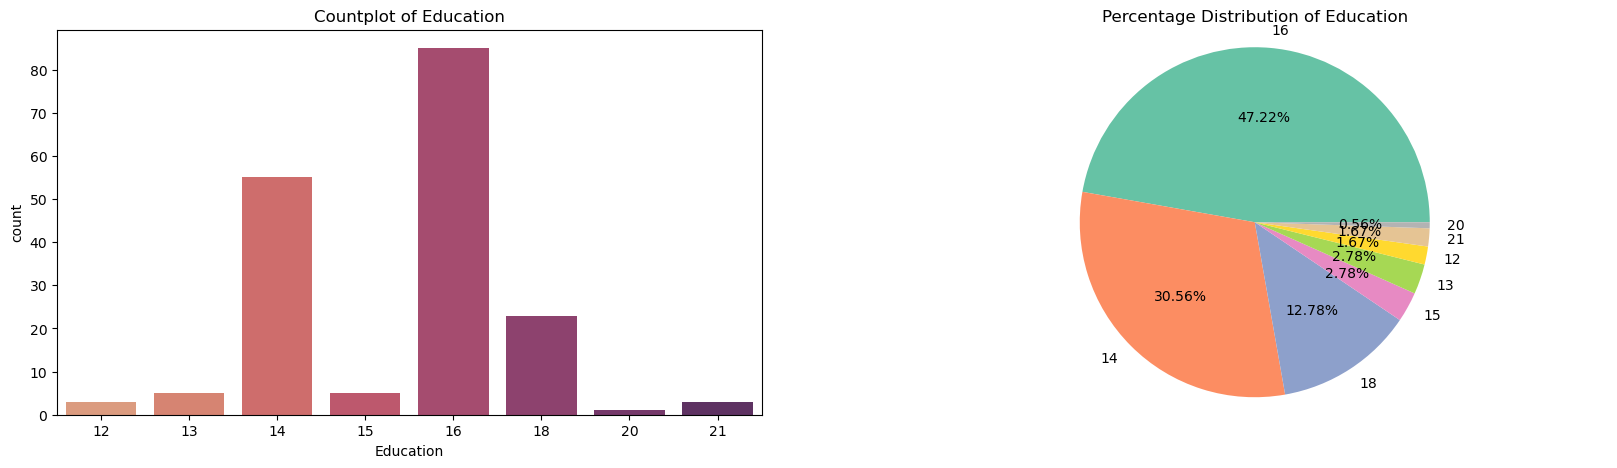

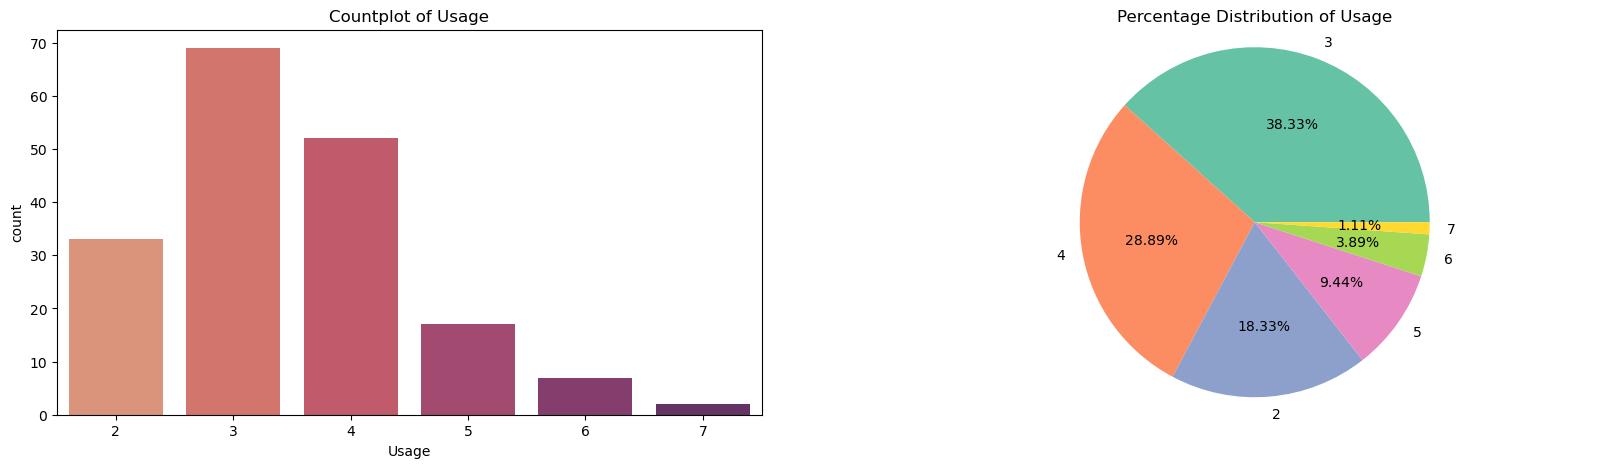

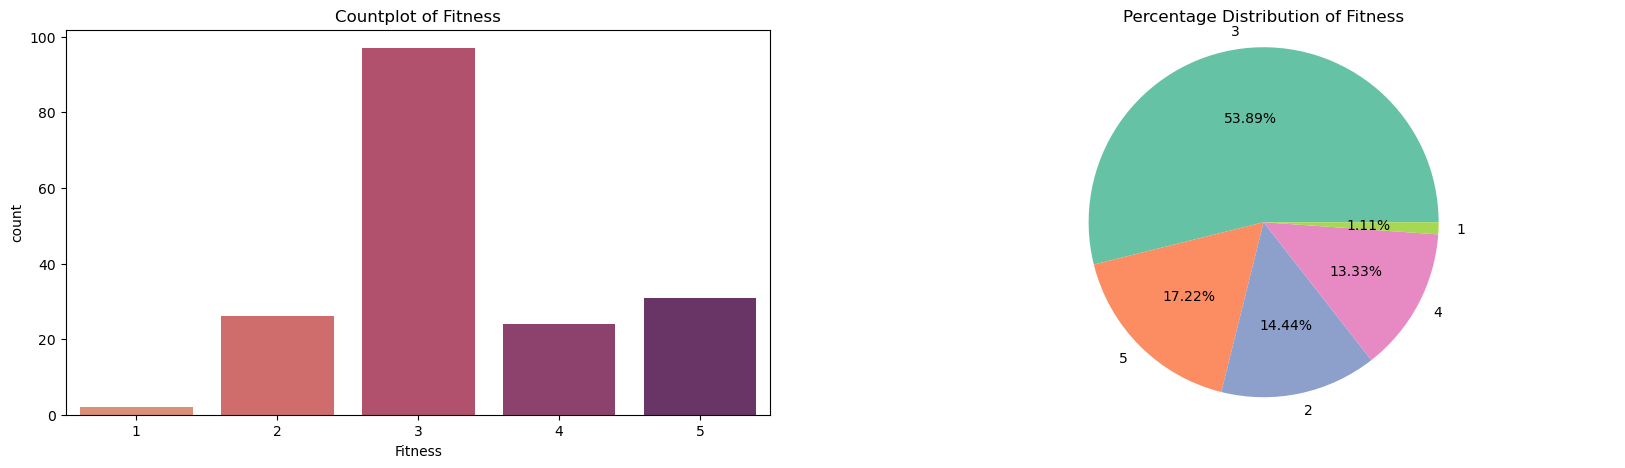

In [100]:
plots('Product',data)
plots('MaritalStatus',data)
plots('Gender',data)
plots('Education',data)
plots('Usage',data)
plots('Fitness',data)

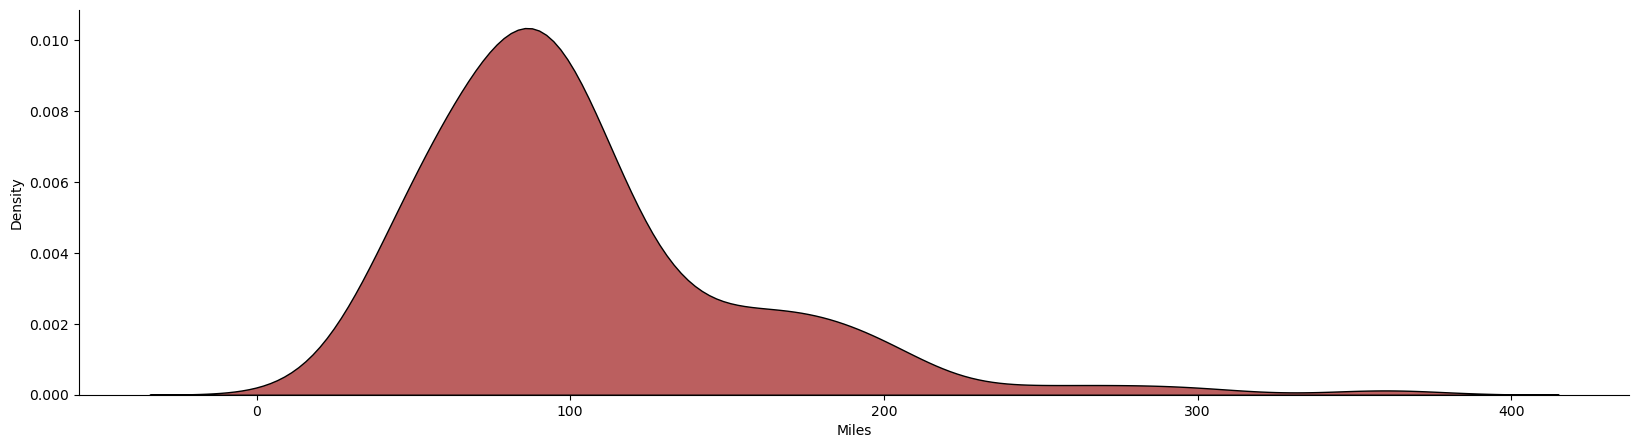

In [98]:
plt.figure(figsize=(20,5))
sns.kdeplot(x=data['Miles'],multiple='stack',color='brown')
sns.despine()
plt.show()

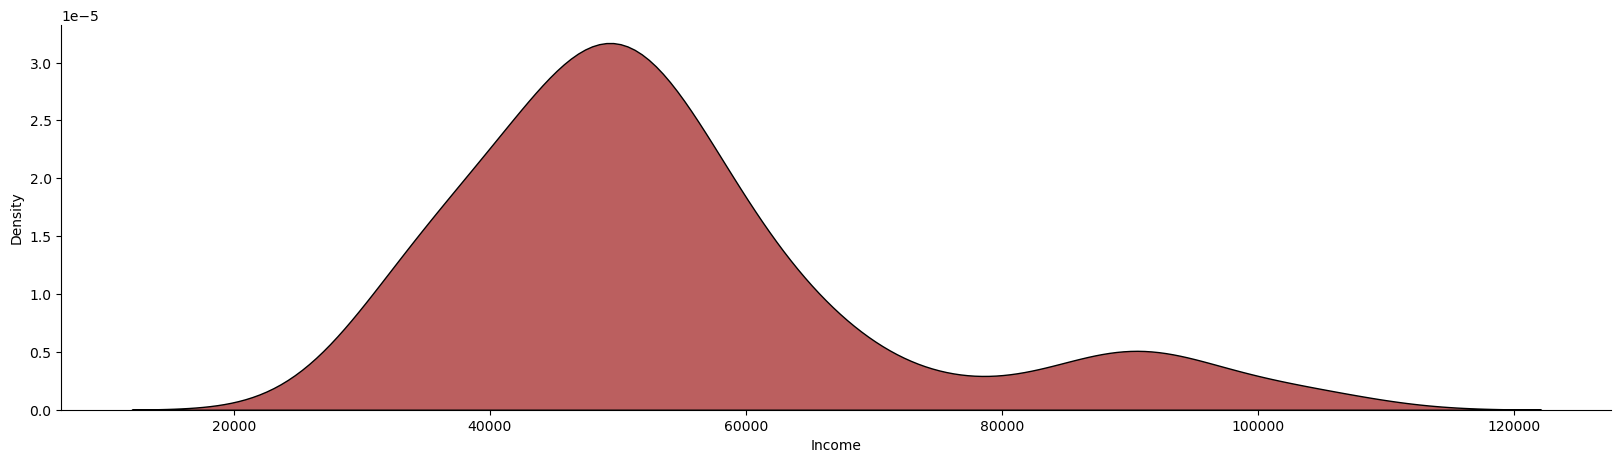

In [132]:
plt.figure(figsize=(20,5))
sns.kdeplot(x=data['Income'],multiple='stack',color='brown')
sns.despine()
plt.show()

# `DATA VISUALIZATION(BIVARIATE ANALYSIS)`

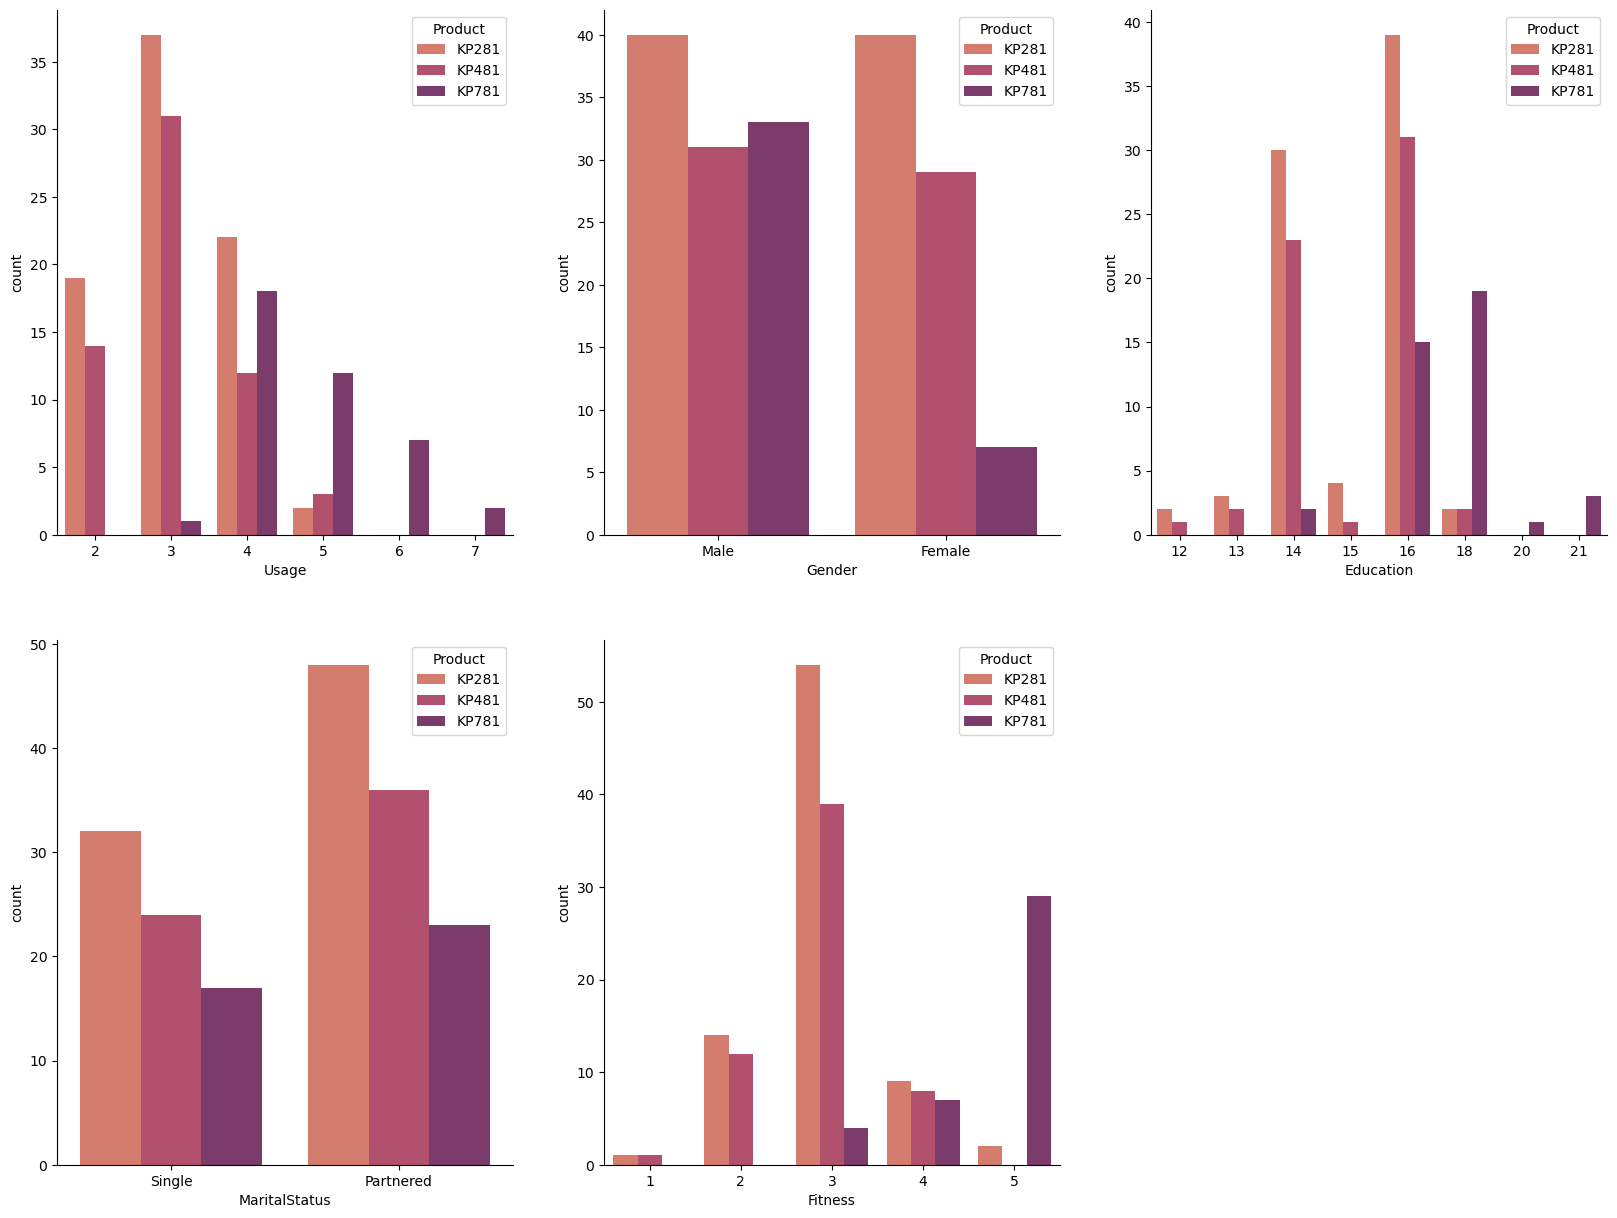

In [131]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.countplot(x=data['Usage'],hue=data['Product'],palette='flare')
plt.subplot(2,3,2)
sns.countplot(x=data['Gender'],hue=data['Product'],palette='flare')
plt.subplot(2,3,3)
sns.countplot(x=data['Education'],hue=data['Product'],palette='flare')
plt.subplot(2,3,4)
sns.countplot(x=data['MaritalStatus'],hue=data['Product'],palette='flare')
plt.subplot(2,3,5)
sns.countplot(x=data['Fitness'],hue=data['Product'],palette='flare')
sns.despine()
plt.show()

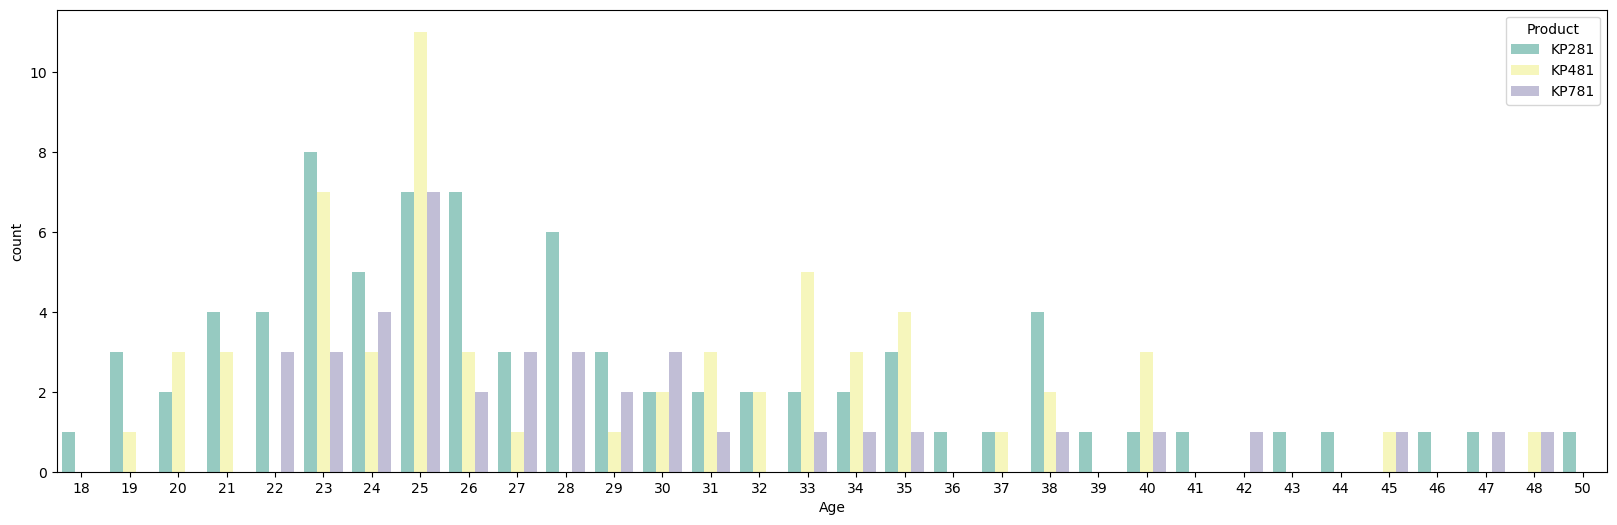

In [89]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['Age'],hue=data['Product'],palette='Set3')
plt.show()

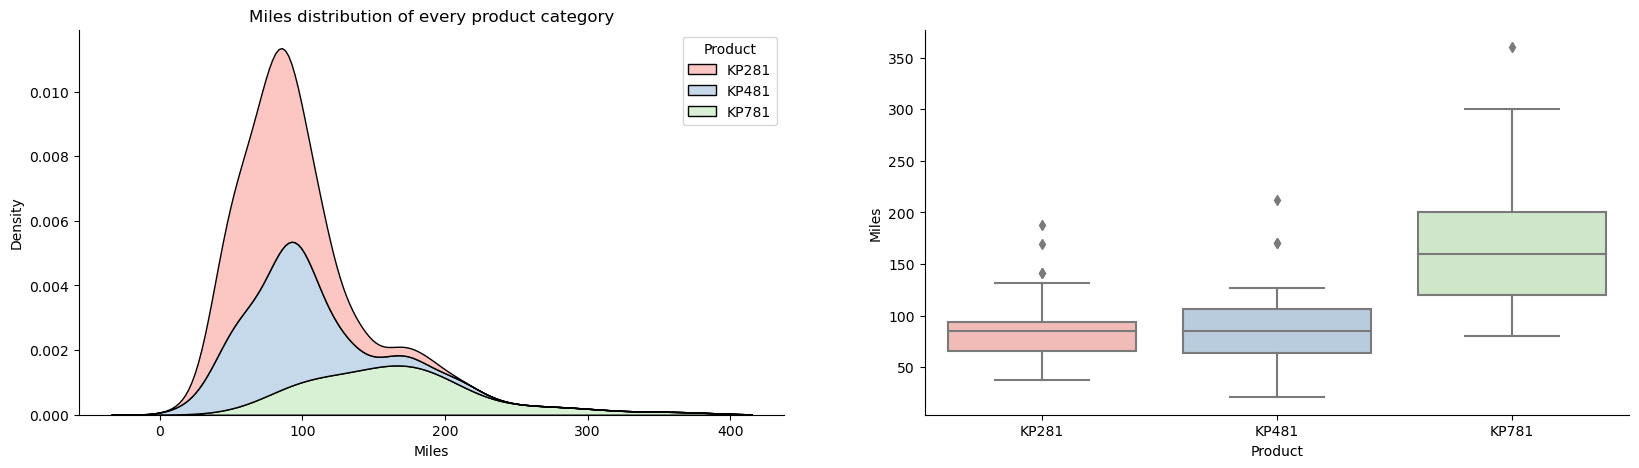

In [90]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(x=data['Miles'],hue=data['Product'],multiple='stack',palette='Pastel1')
plt.title('Miles distribution of every product category')
plt.subplot(1,2,2)
sns.boxplot(y=data['Miles'],x=data['Product'],palette='Pastel1')
# plt.title('Miles distribution of every product category')
sns.despine()
plt.show()

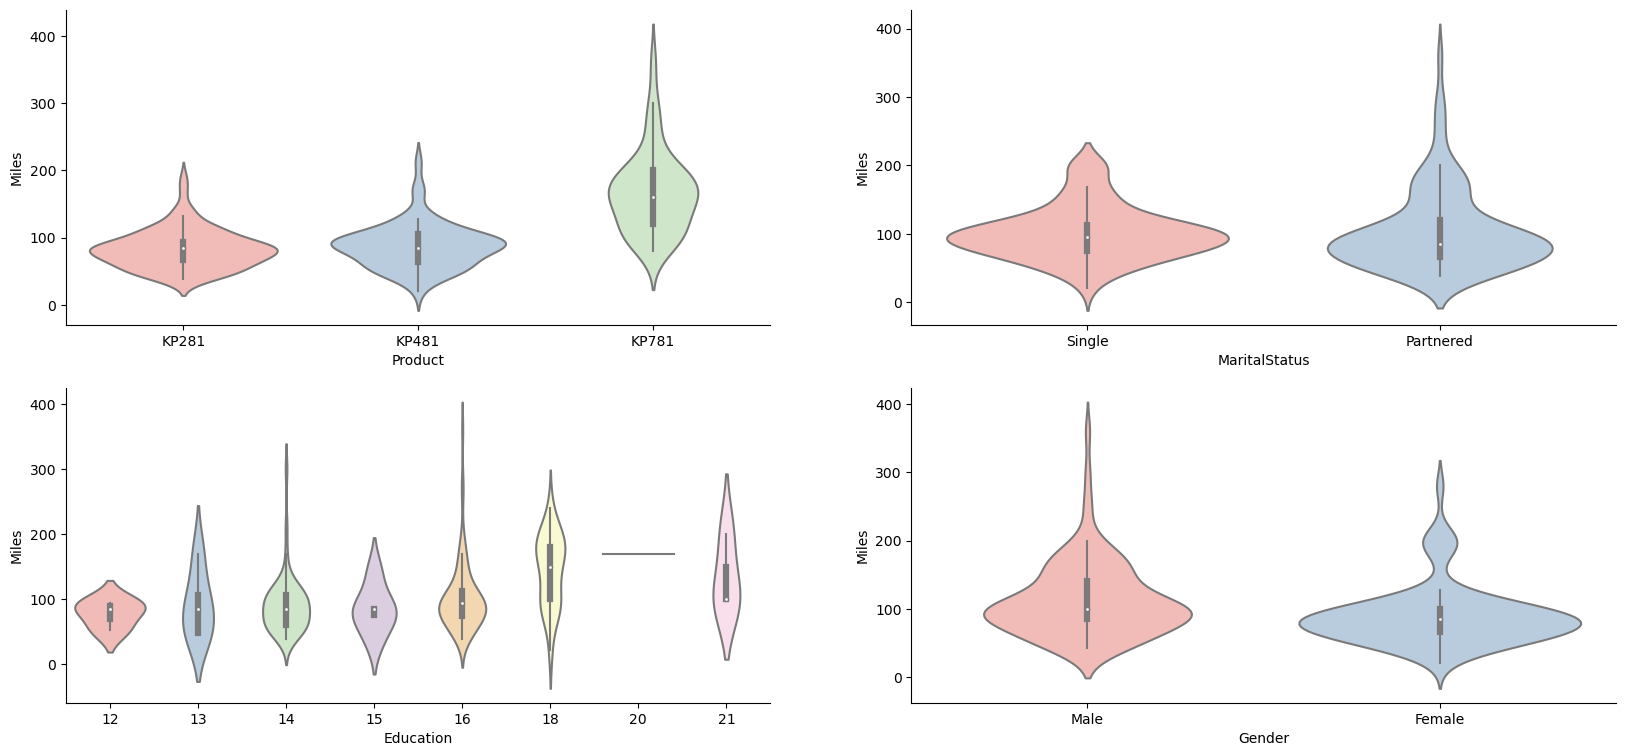

In [112]:
plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
sns.violinplot(x=data['Product'],y=data['Miles'],palette='Pastel1')
plt.subplot(2,2,2)
sns.violinplot(data=data,y='Miles',x='MaritalStatus',palette="Pastel1")
plt.subplot(2,2,3)
sns.violinplot(x=data['Education'],y=data['Miles'],palette='Pastel1')
plt.subplot(2,2,4)
sns.violinplot(x=data['Gender'],y=data['Miles'],palette='Pastel1')
sns.despine()
plt.show()

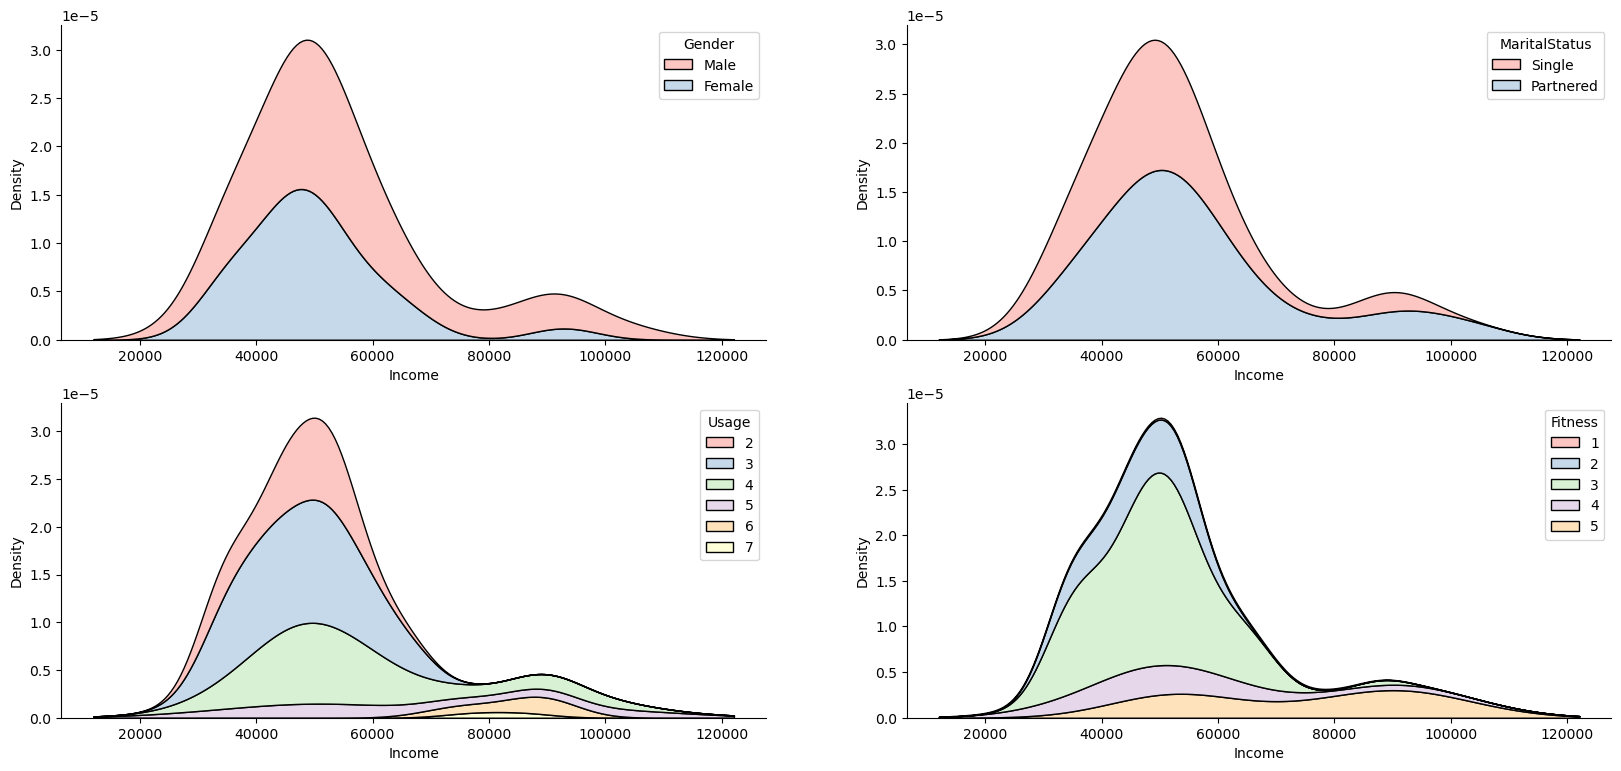

In [134]:
plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
sns.kdeplot(x=data['Income'],hue=data.Gender,multiple='stack',palette='Pastel1')
plt.subplot(2,2,2)
sns.kdeplot(x=data['Income'],hue=data.MaritalStatus,multiple='stack',palette='Pastel1')
plt.subplot(2,2,3)
sns.kdeplot(x=data['Income'],hue=data.Usage,multiple='stack',palette='Pastel1')
plt.subplot(2,2,4)
sns.kdeplot(x=data['Income'],hue=data.Fitness,multiple='stack',palette='Pastel1')
sns.despine()
plt.show()

# `DATA VISUALIZATIONA(MULTIVARIATE ANALYSIS)`

<Figure size 2000x1200 with 0 Axes>

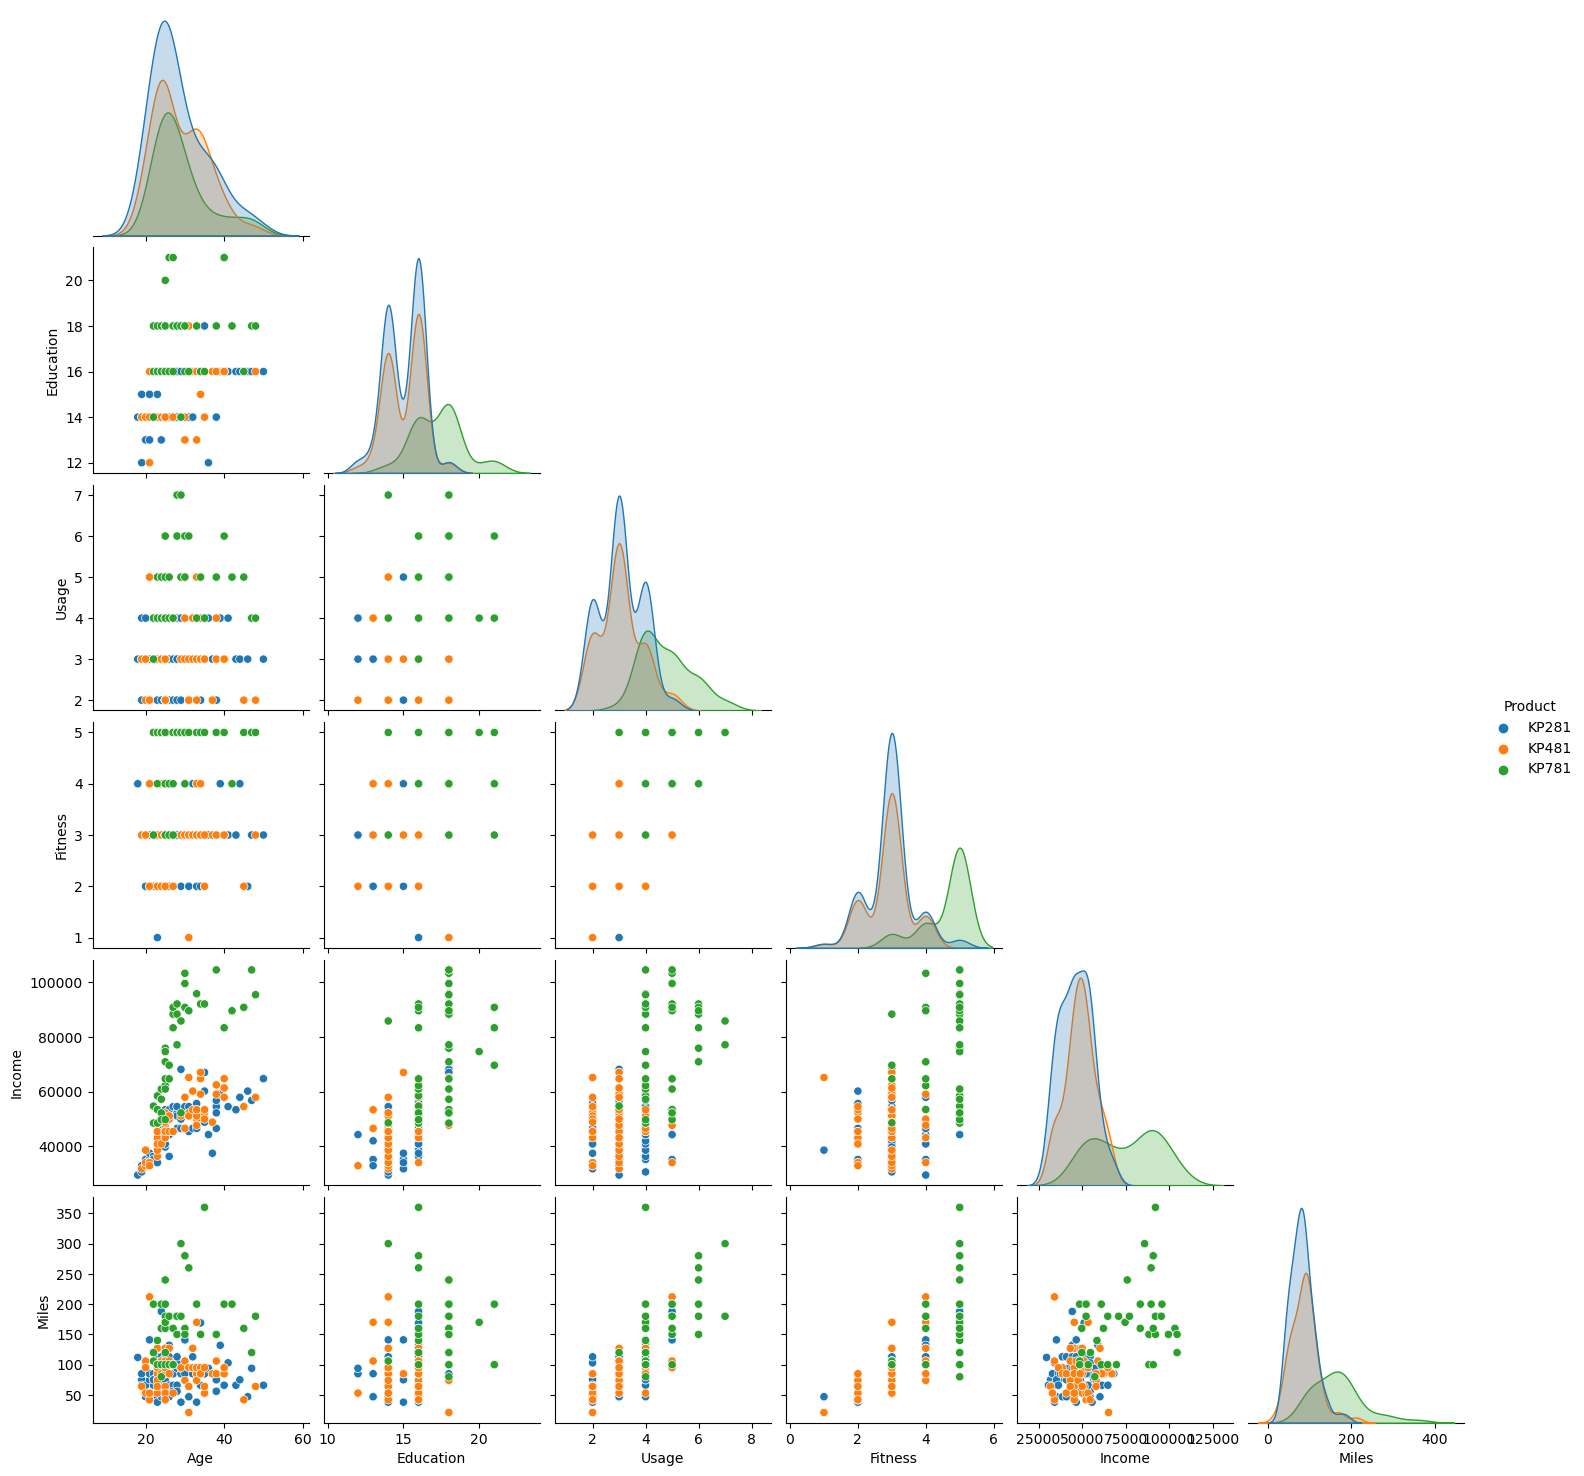

In [152]:
# figure 23
plt.figure(figsize=(20,12))
sns.pairplot(data,corner=True,hue='Product')
plt.show()

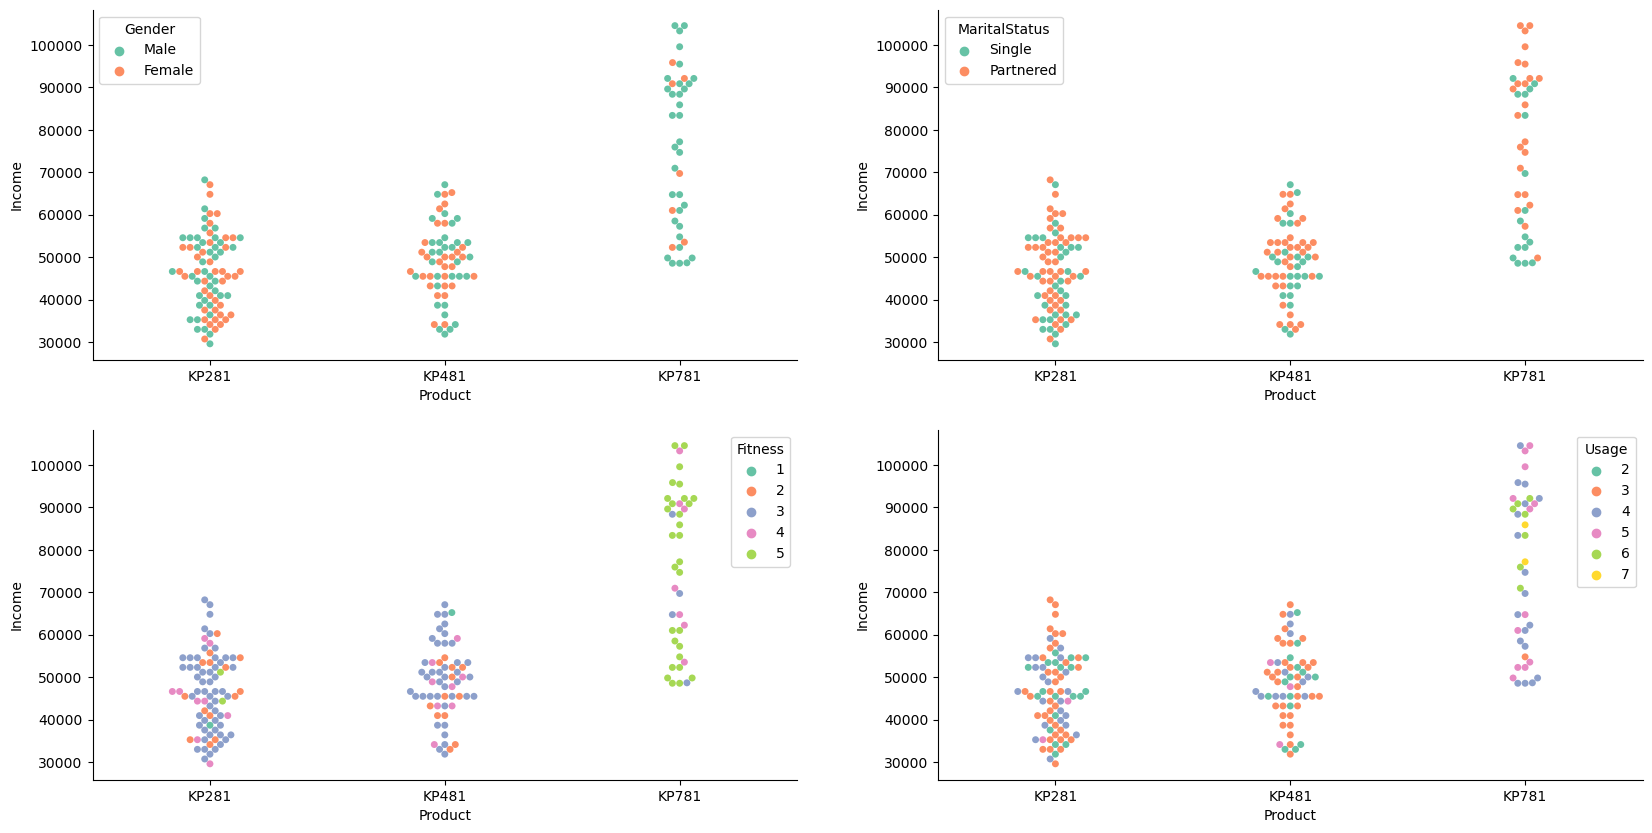

In [147]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.swarmplot(x=data['Product'],y=data['Income'],hue=data['Gender'],palette='Set2')
plt.subplot(2,2,2)
sns.swarmplot(x=data['Product'],y=data['Income'],hue=data['MaritalStatus'],palette='Set2')
plt.subplot(2,2,3)
sns.swarmplot(x=data['Product'],y=data['Income'],hue=data['Fitness'],palette='Set2')
plt.subplot(2,2,4)
sns.swarmplot(x=data['Product'],y=data['Income'],hue=data['Usage'],palette='Set2')
sns.despine()
plt.show()

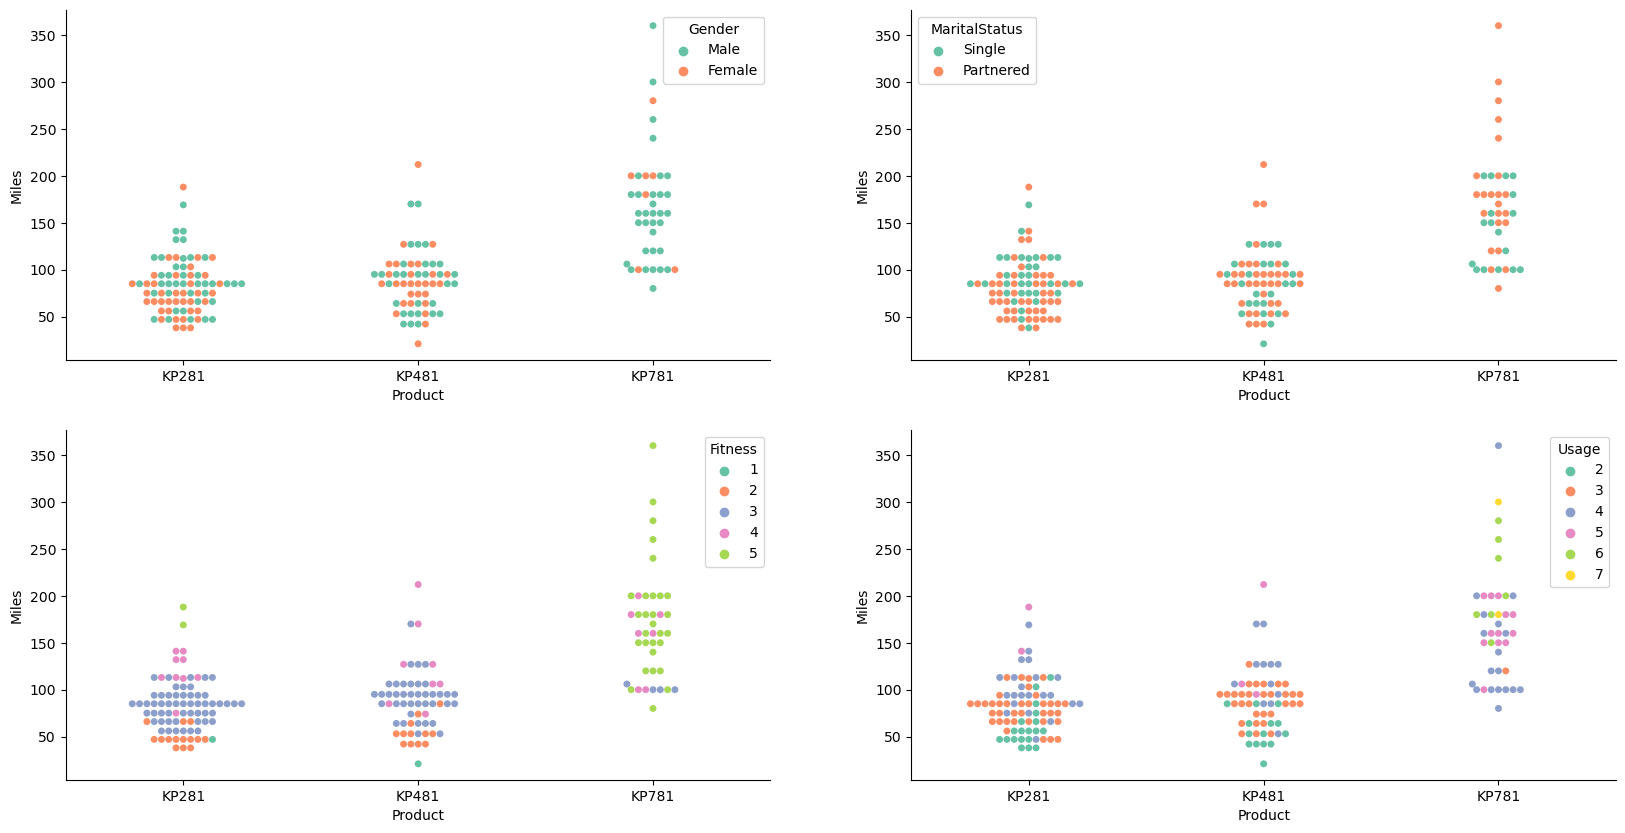

In [149]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.swarmplot(x=data['Product'],y=data['Miles'],hue=data['Gender'],palette='Set2')
plt.subplot(2,2,2)
sns.swarmplot(x=data['Product'],y=data['Miles'],hue=data['MaritalStatus'],palette='Set2')
plt.subplot(2,2,3)
sns.swarmplot(x=data['Product'],y=data['Miles'],hue=data['Fitness'],palette='Set2')
plt.subplot(2,2,4)
sns.swarmplot(x=data['Product'],y=data['Miles'],hue=data['Usage'],palette='Set2')
sns.despine()
plt.show()

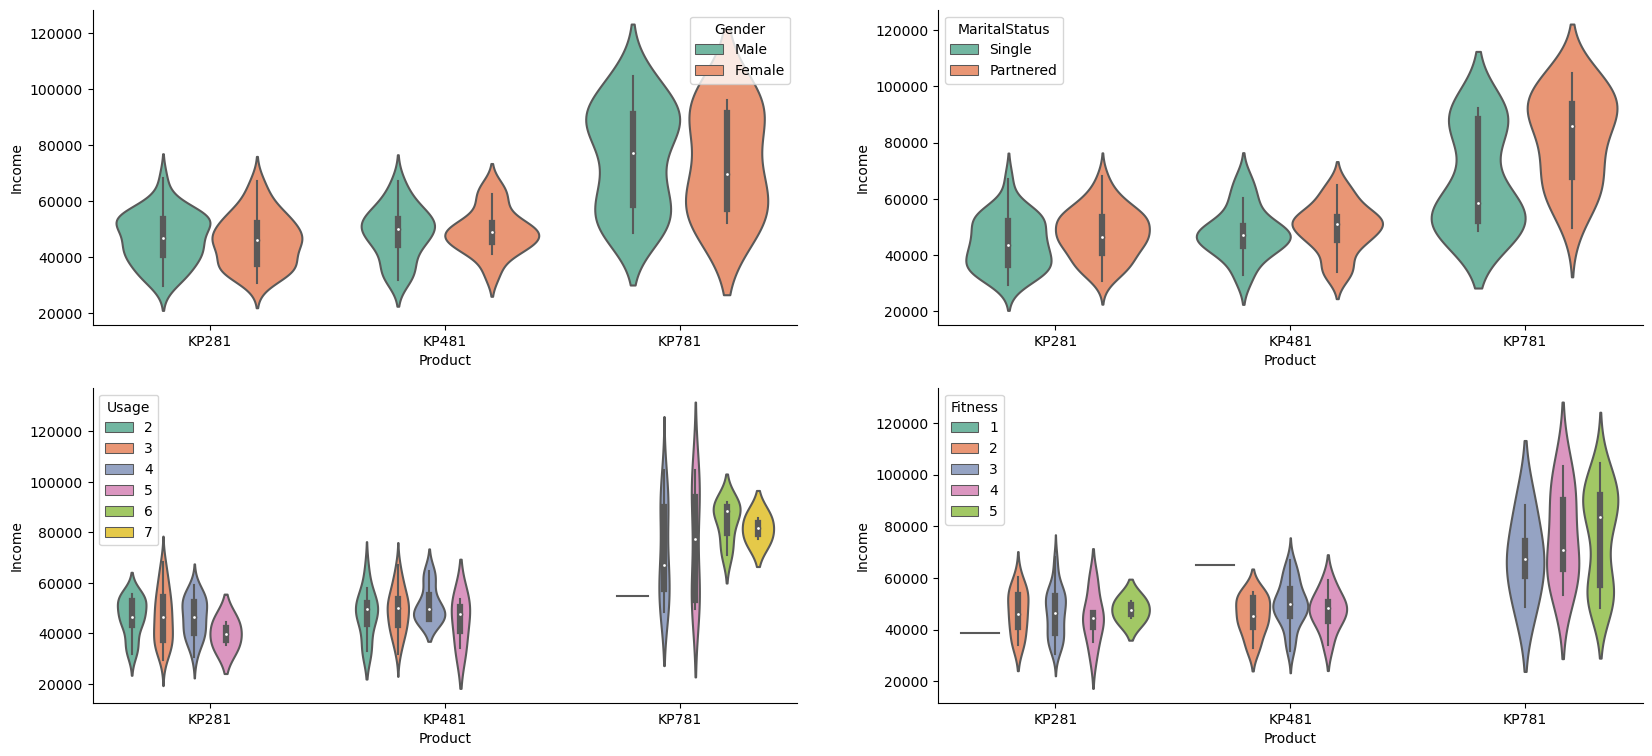

In [157]:
plt.figure(figsize=(20,9))
plt.subplot(2,2,1)
sns.violinplot(x=data['Product'],y=data['Income'],hue=data['Gender'],palette='Set2')
plt.subplot(2,2,2)
sns.violinplot(x=data['Product'],y=data['Income'],hue=data['MaritalStatus'],palette='Set2')
plt.subplot(2,2,3)
sns.violinplot(x=data['Product'],y=data['Income'],hue=data['Usage'],palette='Set2')
plt.subplot(2,2,4)
sns.violinplot(x=data['Product'],y=data['Income'],hue=data['Fitness'],palette='Set2')
sns.despine()
plt.show()

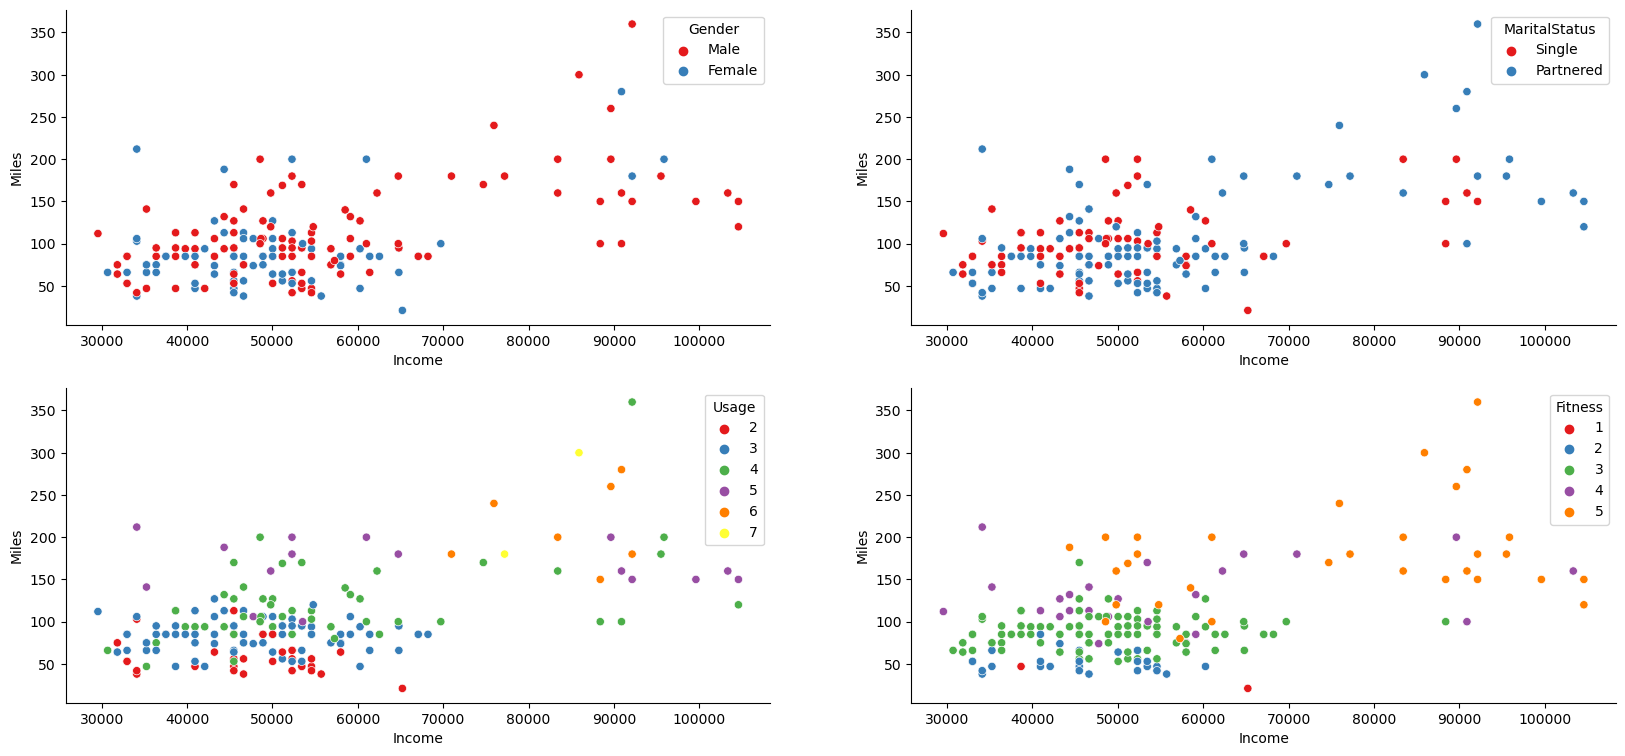

In [154]:
plt.figure(figsize=(20, 9))
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['Income'], y=data['Miles'], hue=data['Gender'], palette='Set1')
plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Income'], y=data['Miles'], hue=data['MaritalStatus'], palette='Set1')
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Income'], y=data['Miles'], hue=data['Usage'], palette='Set1')
plt.subplot(2, 2, 4)
sns.scatterplot(x=data['Income'], y=data['Miles'], hue=data['Fitness'], palette='Set1')
sns.despine()
plt.show()


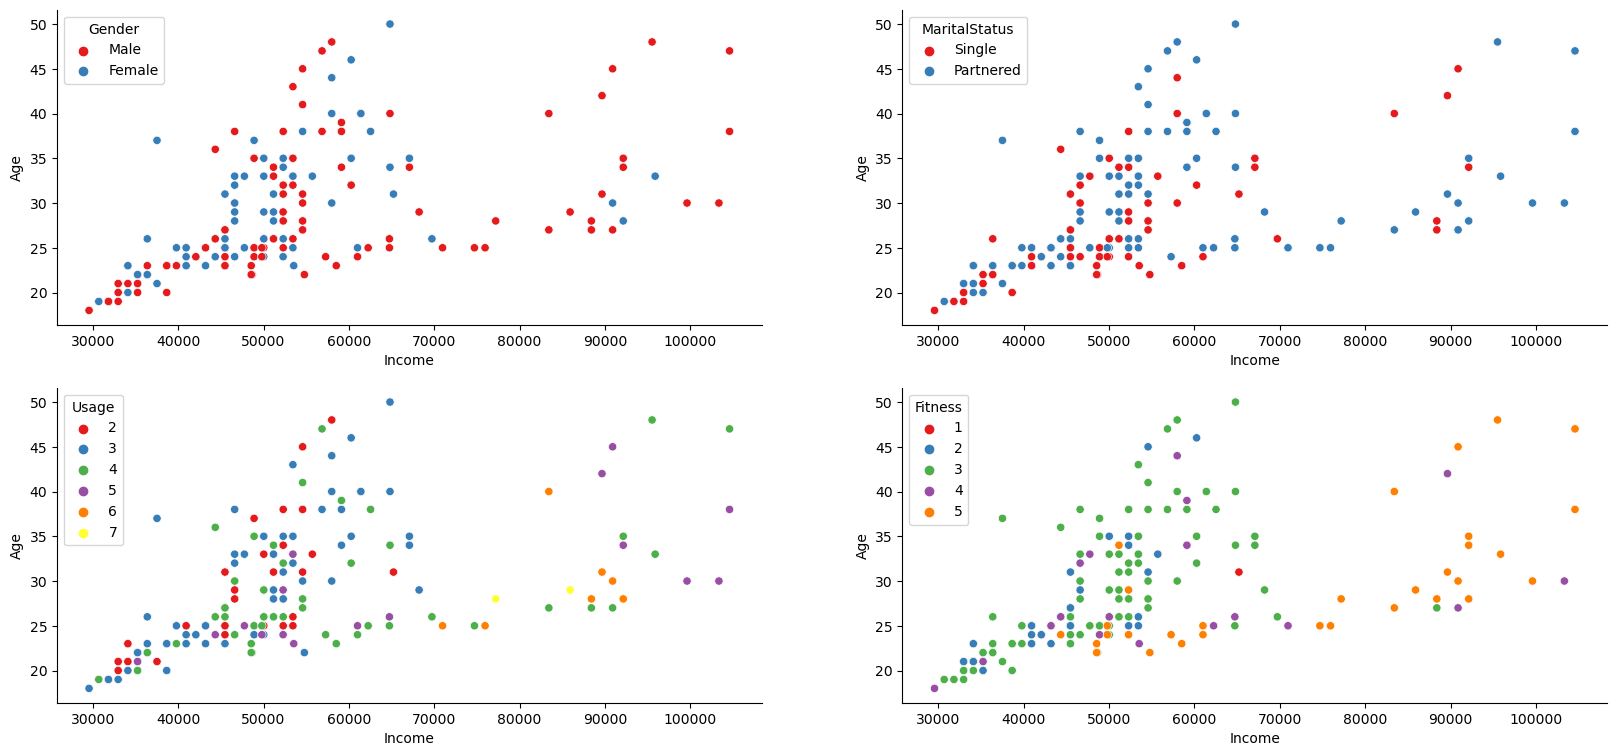

In [158]:
plt.figure(figsize=(20, 9))
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['Income'], y=data['Age'], hue=data['Gender'], palette='Set1')
plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Income'], y=data['Age'], hue=data['MaritalStatus'], palette='Set1')
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Income'], y=data['Age'], hue=data['Usage'], palette='Set1')
plt.subplot(2, 2, 4)
sns.scatterplot(x=data['Income'], y=data['Age'], hue=data['Fitness'], palette='Set1')
sns.despine()
plt.show()


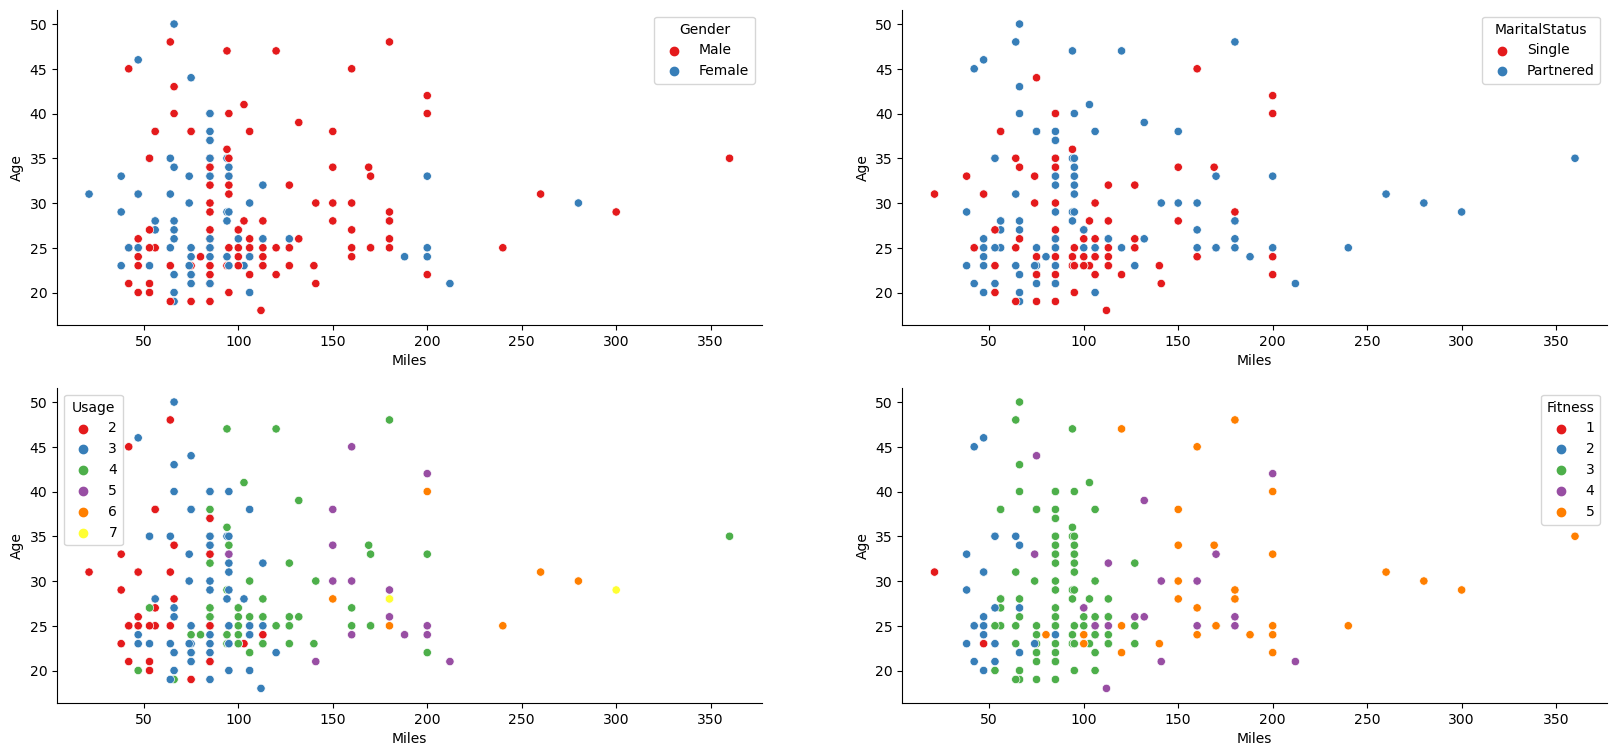

In [159]:
plt.figure(figsize=(20, 9))
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['Miles'], y=data['Age'], hue=data['Gender'], palette='Set1')
plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Miles'], y=data['Age'], hue=data['MaritalStatus'], palette='Set1')
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Miles'], y=data['Age'], hue=data['Usage'], palette='Set1')
plt.subplot(2, 2, 4)
sns.scatterplot(x=data['Miles'], y=data['Age'], hue=data['Fitness'], palette='Set1')
sns.despine()
plt.show()


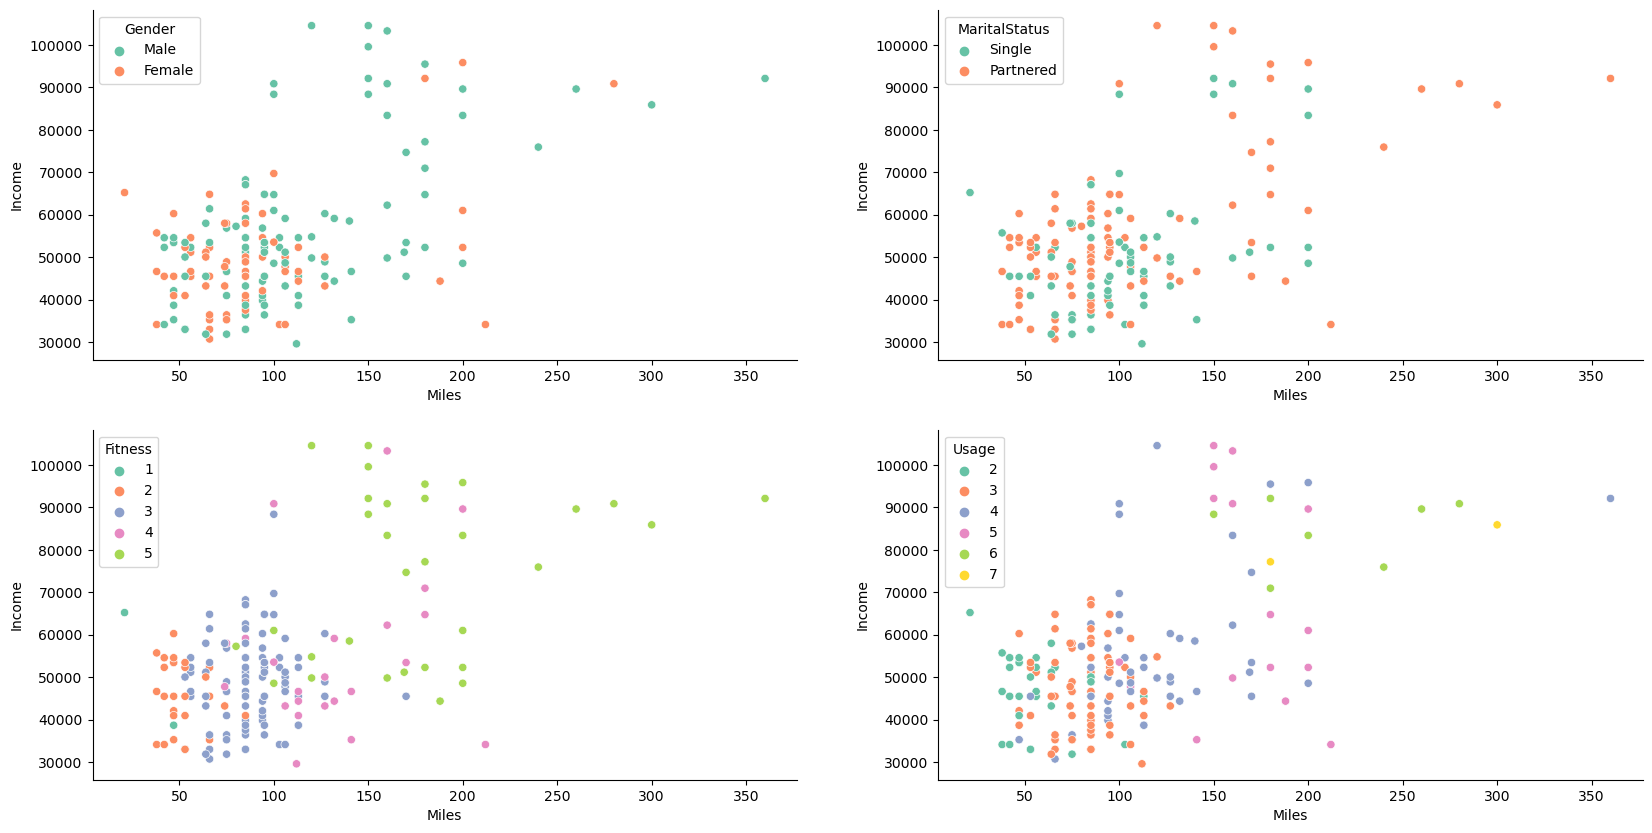

In [160]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(x=data['Miles'],y=data['Income'],hue=data['Gender'],palette='Set2')
plt.subplot(2,2,2)
sns.scatterplot(x=data['Miles'],y=data['Income'],hue=data['MaritalStatus'],palette='Set2')
plt.subplot(2,2,3)
sns.scatterplot(x=data['Miles'],y=data['Income'],hue=data['Fitness'],palette='Set2')
plt.subplot(2,2,4)
sns.scatterplot(x=data['Miles'],y=data['Income'],hue=data['Usage'],palette='Set2')
sns.despine()
plt.show()

# Customer Profilling

A. _KP281_:
* gender: male, female.
* average age: 28.5 years.
* education: between 12-18 years.
* usage: mean= 3 days/ week, median= 3, IQR = 0.
* miles: mean= 82, median= 85, IQR= 18.
* fitness scale form 1 to 3.
* income: median= 46617(in dollars) and IQR= 14781(in dollars).
    
B._KP481_:
* gender: male, female.
* average age: 28.9 years.
* education: between 12-18 years.
* usage: mean= 3.06/week, median= 3, IQR= 0.75.
* miles: mean= 87.93, median= 85, IQR= 42.
* fitness scale from 1 to 3.
* income: median= 49459(in dollars) and IQR= 8528(in dollars).
     
C._KP781_:
* gender: male, female.
* average age: 29.10 years.
* education: between 14-21 years.
* usage: mean= 4.77 /week, median= 5, IQR= 1.
* miles: mean= 166.90, median= 160, IQR= 80.
* fitness scale from 3 to 5.
* income: median= 76588(in dollars) and IQR= 32682(in dollars).